Epoch 1/10


C:\Users\gauta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9033 - loss: 0.3217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9802 - loss: 0.0651
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9866 - loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9898 - loss: 0.0321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0.0230
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9940 - loss: 0.0194
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9945 - loss: 0.0153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9967 - loss: 0.0105
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9962 - loss: 0.0104
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0649
Loss : 0.049730781465768814
Accuracy : 0.9858

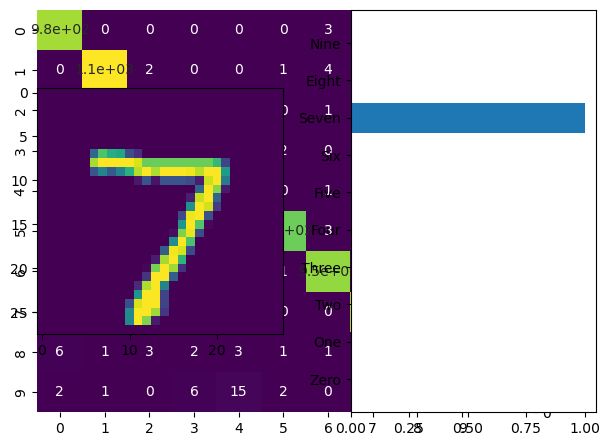

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


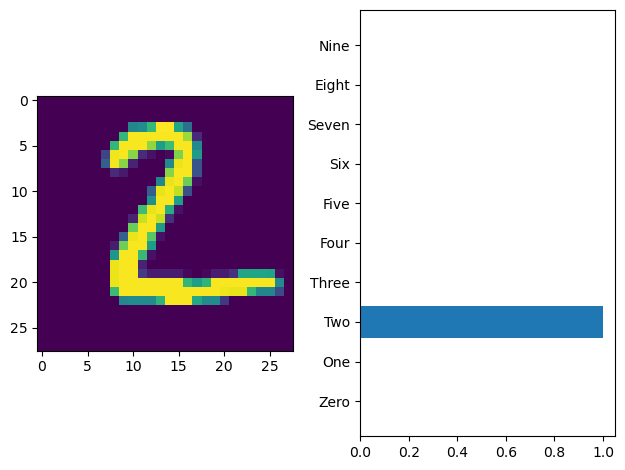

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


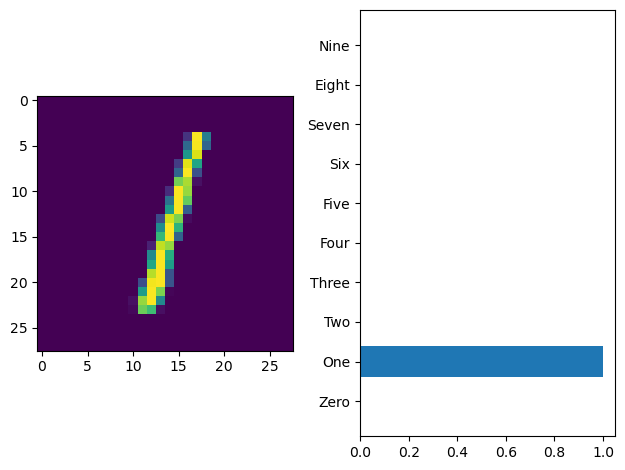

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train/255
X_test=X_test/255
y_test_cat=to_categorical(y_test,10)
y_train_cat=to_categorical(y_train,10)

model=Sequential()
model.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train_cat,epochs=10)


In [27]:
loss,acc=model.evaluate(X_test,y_test_cat)
print(f"Loss : {loss}")
print(f"Accuracy : {acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0649
Loss : 0.049730781465768814
Accuracy : 0.98580002784729


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



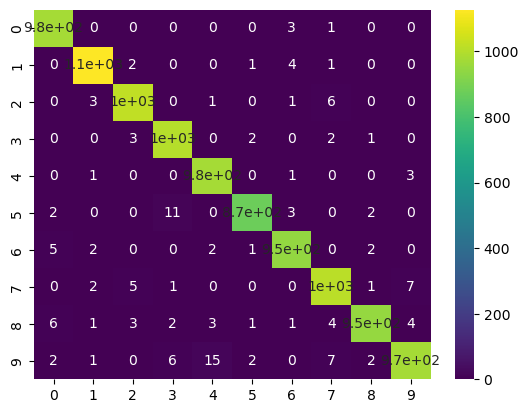

In [28]:
pred=[np.argmax(i)for i in model.predict(X_test)]
sns.heatmap(confusion_matrix(y_test,pred),cmap='viridis',annot=True)
print("\nClassification Report\n",classification_report(y_test,pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


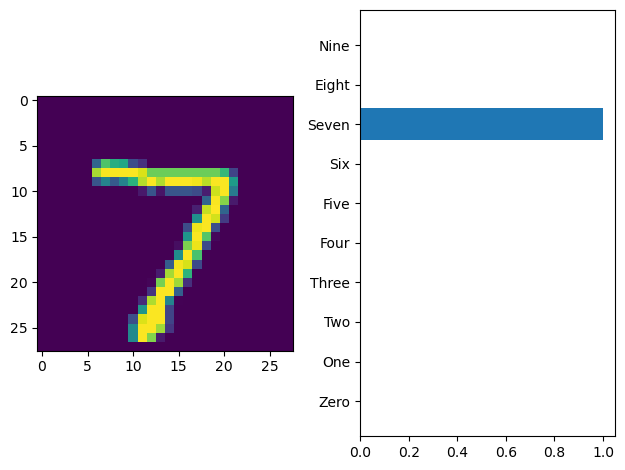

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


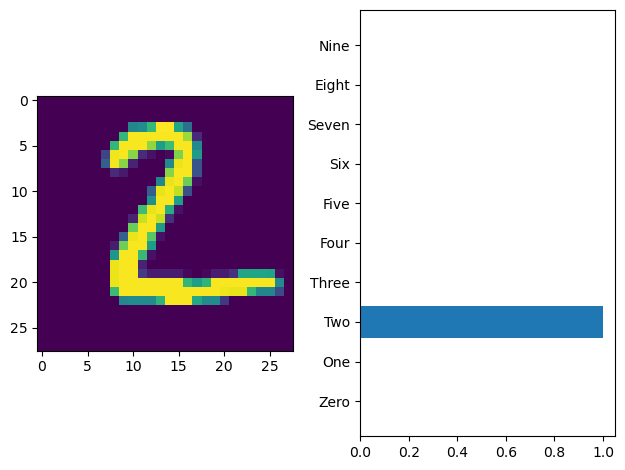

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


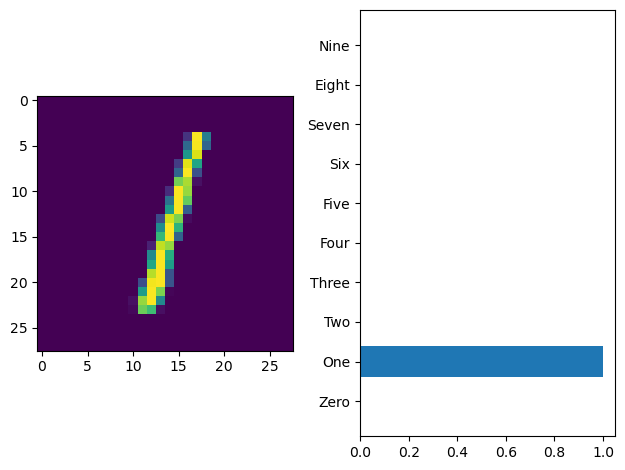

In [29]:
class_labels="Zero One Two Three Four Five Six Seven Eight Nine".split()
for i in range(3):
    plt.subplot(1,2,1)
    plt.imshow(X_test[i])
    plt.subplot(1,2,2)
    pred=model.predict(X_test[i].reshape(1,28,28))
    plt.barh(class_labels,pred[0])
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual value : 7
Predicted value : 7


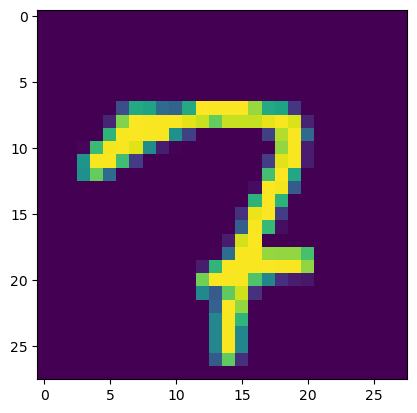

In [37]:
test=X_test[36]
plt.imshow(test)
pred=np.argmax(model.predict(test.reshape(1,28,28)))
print(f"Actual value : {y_test[36]}")
print(f"Predicted value : {pred}")